In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as scs
import random
import math

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df = pd.read_csv(r'C:\Users\sam\Desktop\ab\data\AdSmartABdata.csv', engine = 'python')

In [58]:
#seeing the numerical and categorical data
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['platform_os', 'yes', 'no', 'date+hour']
****************
Categorical Columns: ['auction_id', 'experiment', 'date', 'hour', 'device_make', 'browser']


In [6]:
grouped = df.groupby('experiment')
grouped

In [10]:
control = grouped.get_group('control')
control

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


In [9]:
exposed = grouped.get_group('exposed')
exposed

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
...,...,...,...,...,...,...,...,...,...
8065,ffbc02cb-628a-4de5-87fc-5d76b7d796e5,exposed,2020-07-09,17,Generic Smartphone,6,Chrome Mobile,0,0
8067,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,2020-07-05,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0


In [57]:
df['date+hour'] = pd.to_datetime(df['date'] + ':'+ df['hour'], format='%Y-%m-%d:%H', errors='raise')
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,date+hour
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-10 08:00:00
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-07 10:00:00
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,2020-07-05 02:00:00
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,2020-07-03 15:00:00
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-03 15:00:00
...,...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-05 07:00:00
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-03 15:00:00
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-04 09:00:00
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,2020-07-05 15:00:00


In [3]:
def transform_data(df):
    '''
    segment data into exposed and control groups
    consider that SmartAd runs the experment hourly, group data into hours. 
    Hint: create new column to hold date+hour and use df.column.map(lambda x:  pd.Timestamp(x,tz=None).strftime('%Y-%m-%d:%H'))
    create two dataframes with bernouli series 1 for posetive(yes) and 0 for negative(no)
    Hint: Given engagement(sum of yes and no until current observation as an array) and success (yes countas an array), the method generates random binomial distribution
    #Example
       engagement = np.array([5, 3, 3])
       yes = np.array([2, 0, 3])       
     Output is "[1] 1 0 1 0 0 0 0 0 1 1 1", showing a binary array of 5+3+3 values
     of which 2 of the first 5 are ones, 0 of the next 3 are ones, and all 3 of
     the last 3 are ones where position the ones is randomly distributed within each group.

    '''
    relevant_rows = df.query('yes == 1 | no == 1')

    grouped = relevant_rows.groupby('experiment')
    exposed_df = grouped.get_group('exposed')
    control_df = control = grouped.get_group('control')

    exposed_df['engagement'] = exposed_df['yes'] + exposed_df['no']
    control_df['engagement'] = control_df['yes'] + control_df['no']

    exposed_df['success'] = exposed_df['yes'] 
    control_df['success'] = control_df['yes'] 

    expo_p = sum(exposed_df['success']) / sum(exposed_df['engagement'])
    cont_p = sum(control_df['success']) / sum(control_df['engagement'])

    exposed_engagement = exposed_df['engagement'].to_numpy()
    control_engagement = control_df['engagement'].to_numpy()

    exposed = np.random.choice([0, 1], size=((np.sum(exposed_engagement)),), p=[expo_p, 1-expo_p])
    control = np.random.choice([0, 1], size=((np.sum(control_engagement)),), p=[cont_p , 1-cont_p ])


    
    return exposed, control

In [21]:
def conditionalSPRT(x,y,t1,alpha=0.05,beta=0.10,stop=None):
    """
    #
    # Meeker's SPRT for matched `x` (treatment) and `y` (control), 
    # both indicator responses, likelihood ratio t1, error rates alpha and beta,
    # and (optionally) truncation after trial stop.
    #
    # The return variable contains these elements:
    #(outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)
    # * outcome:   "continue," "reject null," or "accept null".
    # * n: number observation used for the decsion
    # * k:     Index at which the outcome decision was made (or NA)
    # * l:     lower critical point
    # * u:     upper critical point
    # * truncate_decision: The approximate decision made after truncate point
    # * truncated: If the test was truncated, the value of `n.0`; NA otherwise
    # * x1:       Original data `x`, cumulative
    # * r:         Cumulative sum of x+y
    # * stats:     Series of cumulative sums of log probability ratios
    # * limits:    Two rows giving lower and upper critical limits, respectively
    #
    """
    
    if t1<=1:
        print('warning',"Odd ratio should exceed 1.")
    if (alpha >0.5) | (beta >0.5):
        print('warning',"Unrealistic values of alpha or beta were passed."
                 +" You should have good reason to use large alpha & beta values")
    if stop!=None:
        stop=math.floor(n0)

    def comb(n, k):
        return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

    def lchoose(b, j):
        a=[]
        if (type(j) is list) | (isinstance(j,np.ndarray)==True):
            if len(j)<2:
                j=j[0]
        if (type(j) is list) | (isinstance(j,np.ndarray)==True):
            for k in j:
                n=b
                if (0 <= k) & (k<= n):
                    a.append(math.log(comb(n,k)))
                else:
                    a.append(0)
        else:
            n=b
            k=j
            if (0 <= k) & (k<= n):
                a.append(math.log(comb(n,k)))
            else:
                a.append(0)

        return np.array(a)

    def g(x,r,n,t1,t0=1):
        return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

    def h(x,r,n,t=1):
     
        return f(r,n,t,offset=ftermlog(x,r,n,t))

    def f(r,n,t,offset=0):
        upper=max(0,r-n)
        lower=min(n,r)
        rng=list(range(upper,lower+1))
        return np.sum(fterm(rng,r,n,t,offset))

    def fterm(j,r,n,t,offset=0):
        ftlog=ftermlog(j,r,n,t,offset)
        return np.array([math.exp(ex) for ex in ftlog])

    def ftermlog(j,r,n,t,offset=0):
    
        xx=r-j
        lch=lchoose(n,j)
        lchdiff=lchoose(n,xx)
        lg=np.array(j)*math.log(t)
        lgsum=lch+lchdiff
        lgsum2=lgsum+lg
        lgdiff=lgsum2-offset

        return lgdiff

    def logf(r,n,t,offset=0):
     
        z=f(r,n,t,offset)
        if z>0:
            return math.log(z)
        else:
            return np.nan

    def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
     
        offset=ftermlog(math.ceil(r/2),r,n,t1c)
        z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
        a=-math.log(alpha/(1-beta))
        b=math.log(beta/(1-alpha))
        lower=b
        upper=1+a
        return (np.array([lower,upper])+z)/math.log(t1c/t0)

    l=math.log(beta/(1-alpha))
    u=-math.log(alpha/(1-beta))
    sample_size=min(len(x),len(y))
    n=np.array(range(1,sample_size+1))

    if stop!=None:
        n=np.array([z for z in n if z<=stop])
    x1=np.cumsum(x[n-1])
    r=x1+np.cumsum(y[n-1])
    stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g
     #
      # Perform the test by finding the first index, if any, at which `stats`
      # falls outside the open interval (l, u).
      #
    clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
    limits=[]
    for v in clu:
        inArray=[]
        for vin in v:
            inArray.append(math.floor(vin))
        limits.append(np.array(inArray))
    limits=np.array(limits)

    k=np.where((stats>=u) | (stats<=l))
    cvalues=stats[k]
    if cvalues.shape[0]<1:
        k= np.nan
        outcome='Unable to conclude.Needs more sample.'
    else:
        k=np.min(k)
        if stats[k]>=u:
            outcome=f'Exposed group produced a statistically significant increase.'
        else:
            outcome='Their is no statistically significant difference between two test groups'
    if (stop!=None) & (k==np.nan):
      #
      # Truncate at trial stop, using Meeker's H0-conservative formula (2.2).
      # Leave k=NA to indicate the decision was made due to truncation.
      #
        c1=clowerUpper(r,stop,t1,alpha,beta)
        c1=math.floor(np.mean(c1)-0.5)
        if x1[n0]<=c1:
            truncate_decision='h0'
            outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
        else:
            truncate_decision='h1'
            outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
        truncated=stop
    else:
        truncate_decision='Non'
        truncated=np.nan
    return (outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)

In [22]:
class ConditionalSPRT:
     
    def __init__(self, x, y, odd_ratio, alpha=0.05, beta=0.10, stop=None):
        self.x = x
        self.y = y
        self.odd_ratio = odd_ratio
        self.alpha = alpha
        self.beta = beta
        self.stop = stop
   
    def run(self):
        res = conditionalSPRT(self.x, self.y, self.odd_ratio,
                              self.alpha, self.beta,
                              self.stop)
        return res
    def resJson(self, res):
        outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits = res
        jsonRes = {
            "name": "Sequential AB testing",
            "outcome": outcome,
            "decsionMadeIndex": k,
            "numberOfObservation": len(n),
            "truncated": truncated,
            "truncateDecision": truncate_decision,        
      
        }
        return jsonRes
    
    def plotExperiment(self, res):
        outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits = res
        lower = limits[:, 0]
        upper = limits[:,1]

        fig, ax = plt.subplots(figsize=(12,7))

        ax.plot(n, x1, label='Cumlative value of yes+no')

        ax.plot(n, lower, label='Lower Bound', linestyle='--')
        ax.plot(n, upper, label='Upper Bound', linestyle='--')

        plt.legend()


        plt.show()

In [23]:
##data processing here
exposed_group,control_group=transform_data(df)

In [24]:
# odd ratio
#odd_ratio=(expo_p/(1-expo_p))/(cont_p /(1-cont_p ))
odd_ratio = 1.01
alpha = 0.05
beta = 0.1

In [25]:
conditionalSPRTObj = ConditionalSPRT(exposed_group,control_group, odd_ratio, alpha, beta)


In [26]:
res = conditionalSPRTObj.run()

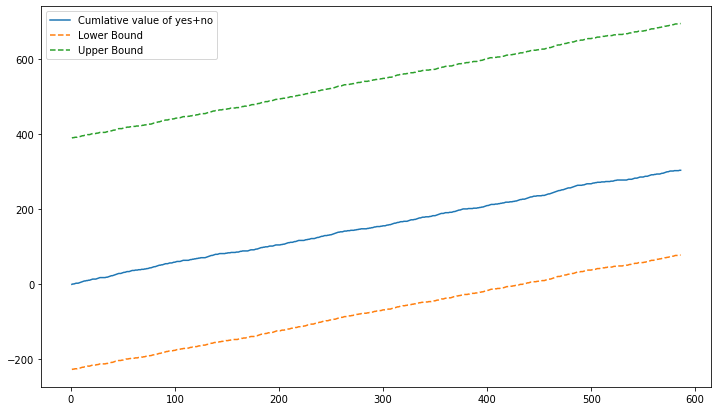

In [27]:
conditionalSPRTObj.plotExperiment(res)